In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('weatherHistory - Copy.csv')



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df=pd.read_csv('weatherHistory - Copy.csv')
df = df.drop('Precip Type', axis=1)


In [ ]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [ ]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
class_mapping = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Clear': 'Clear',
    'Foggy': 'Clear',
    'Breezy and Overcast': 'Breezy',
    'Breezy and Mostly Cloudy': 'Breezy',
    'Breezy and Partly Cloudy': 'Breezy',
    'Dry and Partly Cloudy': 'Cloudy',
    'Windy and Partly Cloudy': 'Breezy',
    'Light Rain': 'Rain',
    'Breezy': 'Breezy',
    'Windy and Overcast': 'Breezy',
    'Humid and Mostly Cloudy': 'Cloudy',
    'Drizzle': 'Rain',
    'Breezy and Foggy': 'Breezy',
    'Windy and Mostly Cloudy': 'Breezy',
    'Dry': 'Clear',
    'Humid and Partly Cloudy': 'Cloudy',
    'Dry and Mostly Cloudy': 'Cloudy',
    'Rain': 'Rain',
    'Windy': 'Breezy',
    'Humid and Overcast': 'Cloudy',
    'Windy and Foggy': 'Breezy',
    'Windy and Dry': 'Cloudy',
    'Dangerously Windy and Partly Cloudy': 'Breezy',
    'Breezy and Dry': 'Breezy'
}

# Map the classes to the new classes
df['Summary'] = df['Summary'].map(class_mapping)

In [ ]:
df['Summary'].value_counts()

Cloudy    76589
Clear     18072
Breezy     1680
Rain        112
Name: Summary, dtype: int64

In [ ]:


# Perform label encoding on the target variable
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df["Summary"])
df['Summary'] = label_encoder.fit_transform(df['Summary'])

# Display the mapping of encoded classes to numbers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Class Mapping:")
for key, value in class_mapping.items():
    print(key, "->", value)


Class Mapping:
Breezy -> 0
Clear -> 1
Cloudy -> 2
Rain -> 3


In [ ]:
df

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,2,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,2,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,2,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [ ]:

df = df.drop('Formatted Date', axis=1)
df = df.drop('Daily Summary', axis=1)


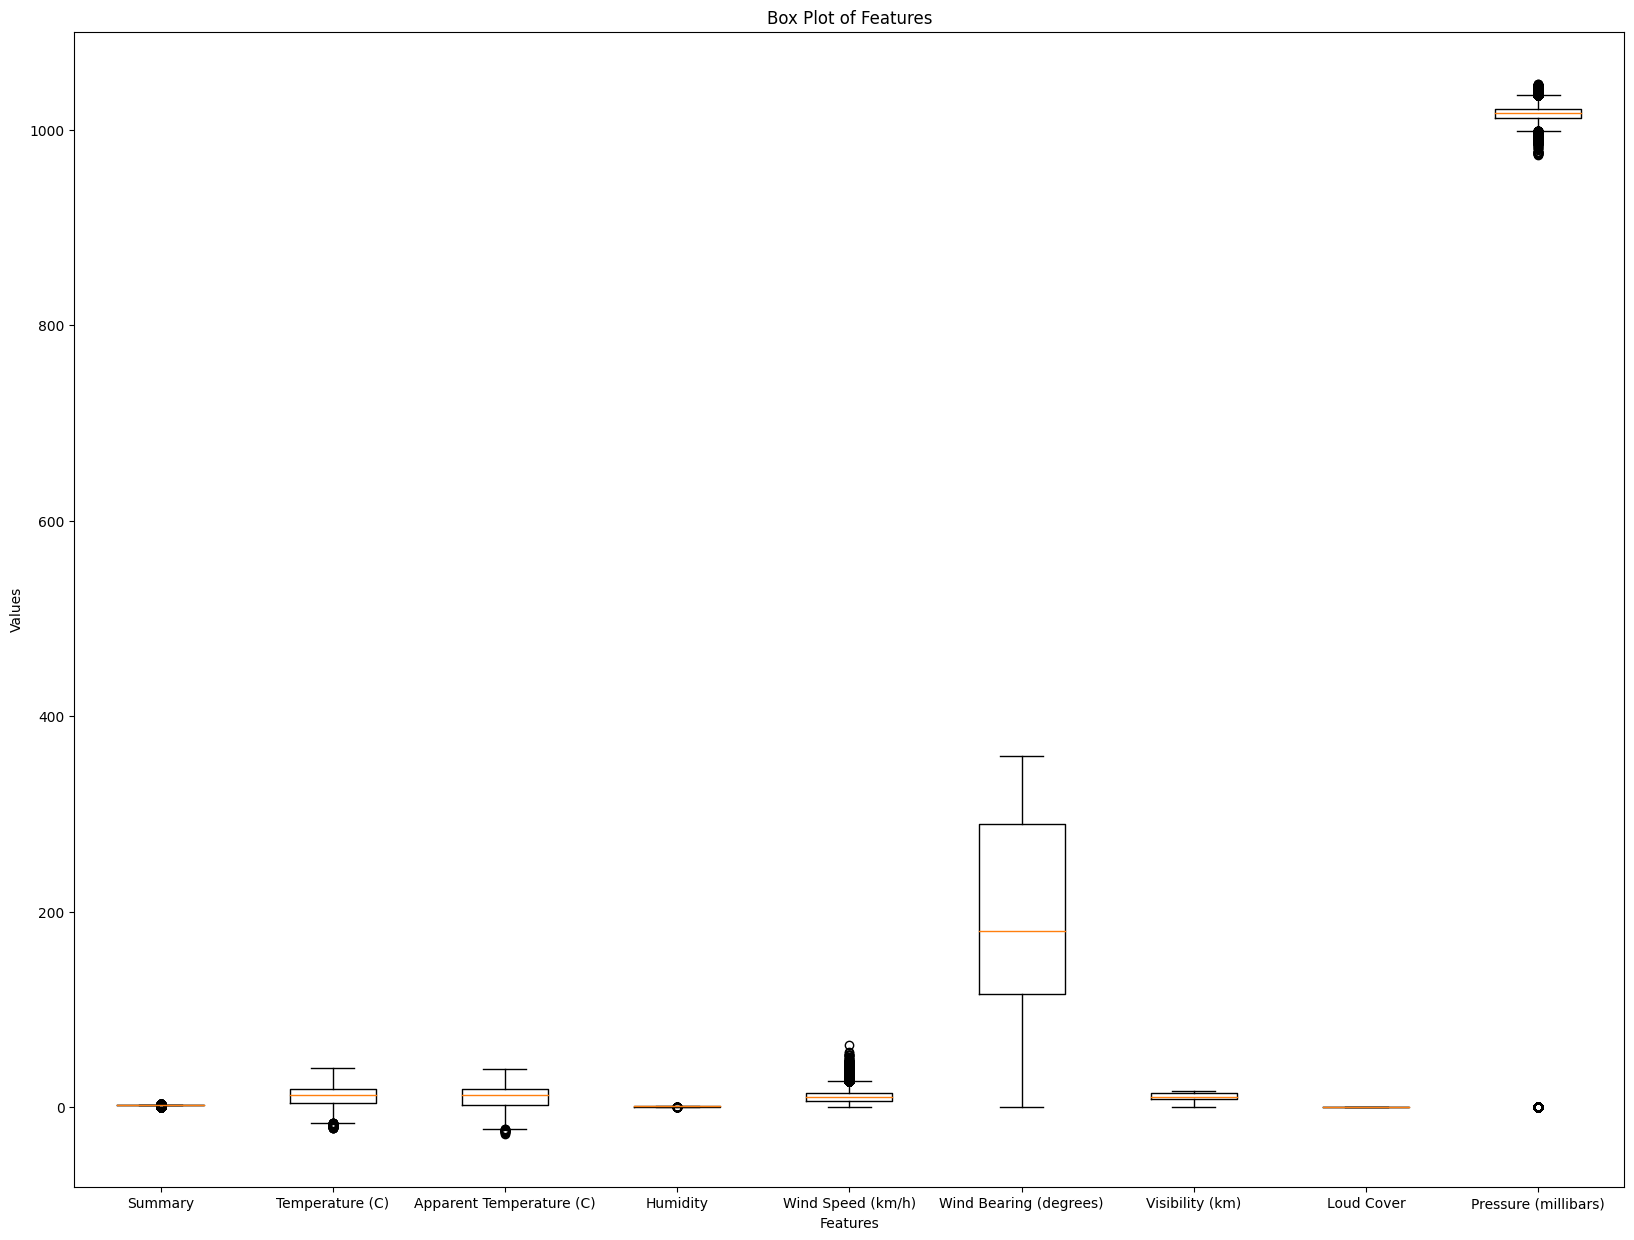

In [ ]:
plt.figure(figsize=(20, 15))
plt.boxplot(df.values, labels=df.columns)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
df = df.drop('Loud Cover', axis=1)

In [ ]:
y=df["Summary"].copy()
y

0        2
1        2
2        2
3        2
4        2
        ..
96448    2
96449    2
96450    2
96451    2
96452    2
Name: Summary, Length: 96453, dtype: int64

In [ ]:
df = df.drop('Summary', axis=1)

In [ ]:
normalizer = MinMaxScaler()

dataset=pd.DataFrame(normalizer.fit_transform(df),columns=df.columns)

In [ ]:
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.970135
1,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.970613
2,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.970909
3,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.971358
4,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.971454


In [ ]:
df_normalized = pd.concat([dataset, y], axis=1)

In [ ]:
df_normalized.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary
0,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.970135,2
1,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.970613,2
2,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.970909,2
3,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.971358,2
4,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.971454,2


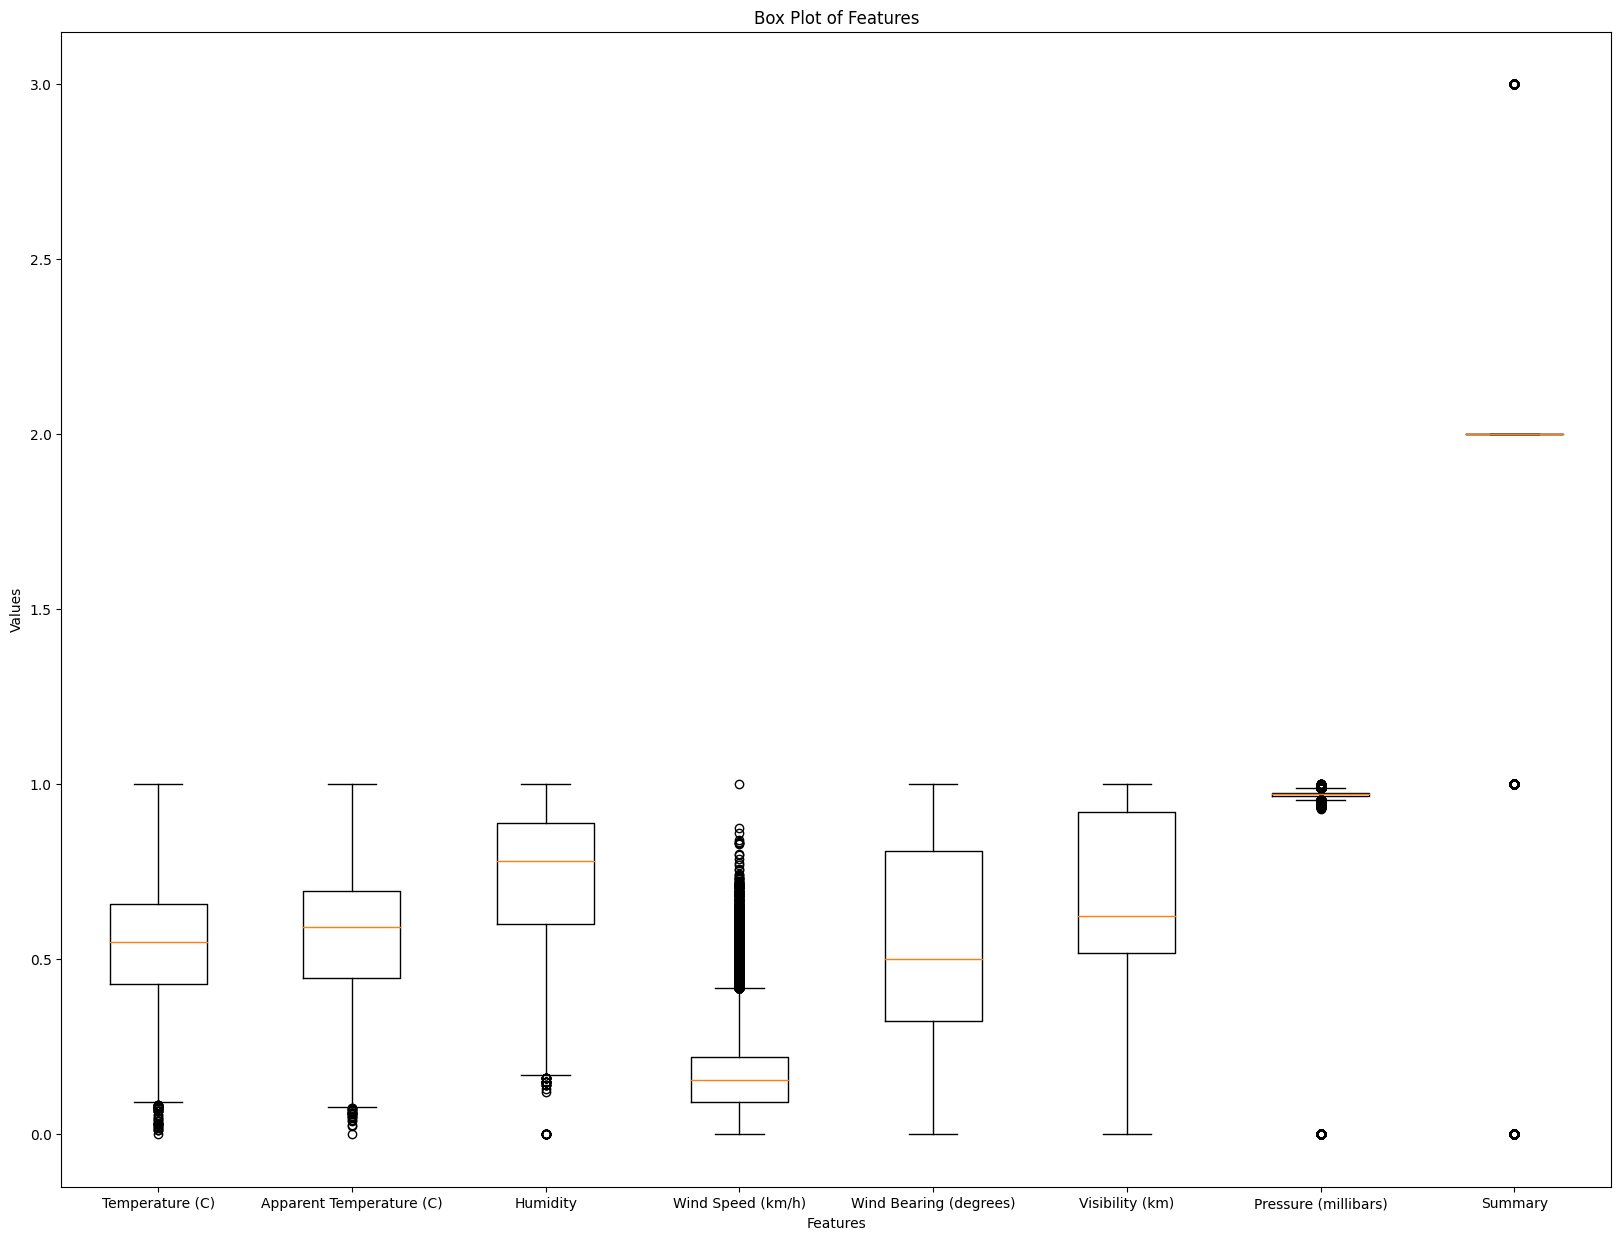

In [ ]:
plt.figure(figsize=(20, 15))
plt.boxplot(df_normalized.values, labels=df_normalized.columns)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
df_normalized.to_csv('cleaned_and_normalized.csv',index=False)